# 평가

### 분류모델 평가

#### 정확도  (Accuracy)
- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

# 성별로만 판단
class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
        
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0:        # 여성
                pred[i] = 1     # 생전
        return pred

In [2]:
# 전처리 -> 함수
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]

    categories = ['Sex', 'Cabin', 'Embarked']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])

    return df

def scailing_feature(train_data, test_data):
    """
    특성 스케일링
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled

def preprocess_data(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [4]:
from sklearn.metrics import accuracy_score

# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 평가 (accurancy_score)
print("훈련 데이터 정확도:", accuracy_score(y_train, pred_train))
print("평가 데이터 정확도:", accuracy_score(y_test, pred_test)) 

훈련 데이터 정확도: 0.7889221556886228
평가 데이터 정확도: 0.7802690582959642


In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

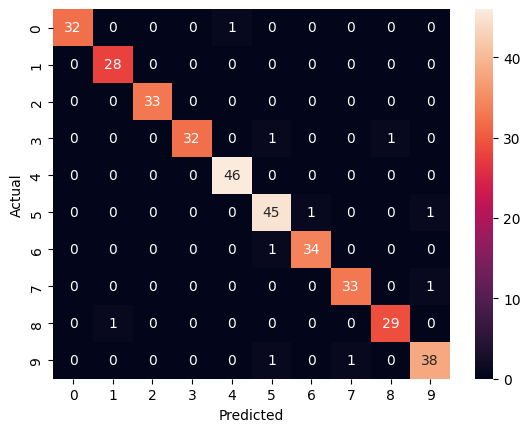

In [25]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP + FP)중에 실제 양성(TP)알 확률
    - 정밀도가 중요한 지표인 경유: 음성인 데이터를 양성으로 예측하면 안되는 경우(스팸메일 분류 등)

![](https://d.pr/i/rtYBJv+)

In [7]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]])

In [8]:
p_score = 59 / (24+59)
p_score, precision_score(y_test, pred_test)

(0.7108433734939759, 0.7108433734939759)

- 재현율
    - 실제 양성 (TP + FN)중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우  : 양성인 데이터를 음성으로 예측하면 안되는 경우(암 진단, 보험/ 금융사기 등)

In [9]:
recall_score(y_test, pred_test)

0.7023809523809523

In [10]:
# 잘못 학습된 모델 만들어보기(2)
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1))    # 전부 사망
    
my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

print("훈련 데이터 혼동행렬:\n", confusion_matrix(y_train, pred_train))
print("훈련 데이터 장확도:\n", accuracy_score(y_train, pred_train))
print("훈련 데이터 정밀도:\n", precision_score(y_train, pred_train))
print("훈련 데이터 재현율:\n", recall_score(y_train, pred_train))

print("데이터 혼동행렬:\n", confusion_matrix(y_test, pred_test))
print("데이터 장확도:\n", accuracy_score(y_test, pred_test))
print("데이터 정밀도:\n", precision_score(y_test, pred_test))
print("데이터 재현율:\n", recall_score(y_test, pred_test))



훈련 데이터 혼동행렬:
 [[410   0]
 [258   0]]
훈련 데이터 장확도:
 0.6137724550898204
훈련 데이터 정밀도:
 0.0
훈련 데이터 재현율:
 0.0
데이터 혼동행렬:
 [[139   0]
 [ 84   0]]
데이터 장확도:
 0.6233183856502242
데이터 정밀도:
 0.0
데이터 재현율:
 0.0


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# 오차행렬, 정확도, 정밀도, 재현율 계산 및 출력 함수
def evaluate_binary_classification(y_true, y_pred):
    print("혼동행렬:\n", confusion_matrix(y_true, y_pred))
    print(f"정확도: {accuracy_score(y_true, y_pred)} 정밀도: {precision_score(y_true, y_pred)} 재현율: {recall_score(y_true, y_pred)}")

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 훈련
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측 및 평기
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬:
 [[350  60]
 [ 78 180]]
정확도: 0.7934131736526946 정밀도: 0.75 재현율: 0.6976744186046512
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982062780269058 정밀도: 0.7349397590361446 재현율: 0.7261904761904762


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도-재현율의 trade-off
    - 분류 결정 임계치(threshold)를 낮추면? Positive로 예측할 확률이 높아진다!
        - 정밀도는 낮아지고, 재현율이 높아진다
    - 분류 결정 임계치(threshold)를 높히면? Positive로 예측할 확률이 낮아진다!
        - 정밀도는 높아지고, 재현율이 낮아진다

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:7])

pred = lr_clf.predict(X_test)
print(pred[:7])

[[0.83388279 0.16611721]
 [0.88893545 0.11106455]
 [0.91997745 0.08002255]
 [0.05652739 0.94347261]
 [0.29788096 0.70211904]
 [0.50951837 0.49048163]
 [0.09503411 0.90496589]]
[0 0 0 1 1 0 1]


In [14]:
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]
# Binarizer(threshoid)
# - threshold보다 크면 1 반환
# - threshold보다 작거나 같으면 0 반환
binarizer = Binarizer(threshold=0)
adj_X = binarizer.fit_transform(temp_X)
adj_X 

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [15]:
from sklearn.preprocessing import Binarizer

# 1(생존)일 확률만 가져오고 + 배치 차원 추가
predict_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

binarizer = Binarizer(threshold=0.6)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982062780269058 정밀도: 0.7349397590361446 재현율: 0.7261904761904762
혼동행렬:
 [[124  15]
 [ 29  55]]
정확도: 0.8026905829596412 정밀도: 0.7857142857142857 재현율: 0.6547619047619048


In [16]:
# 임계치 별 평가 결과 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)
        
evaluate_by_threshold(y_test, predict_proba_1, thresholds)

혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.7802690582959642 정밀도: 0.6842105263157895 재현율: 0.7738095238095238
혼동행렬:
 [[115  24]
 [ 19  65]]
정확도: 0.8071748878923767 정밀도: 0.7303370786516854 재현율: 0.7738095238095238
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982062780269058 정밀도: 0.7349397590361446 재현율: 0.7261904761904762
혼동행렬:
 [[122  17]
 [ 23  61]]
정확도: 0.820627802690583 정밀도: 0.782051282051282 재현율: 0.7261904761904762
혼동행렬:
 [[124  15]
 [ 29  55]]
정확도: 0.8026905829596412 정밀도: 0.7857142857142857 재현율: 0.6547619047619048


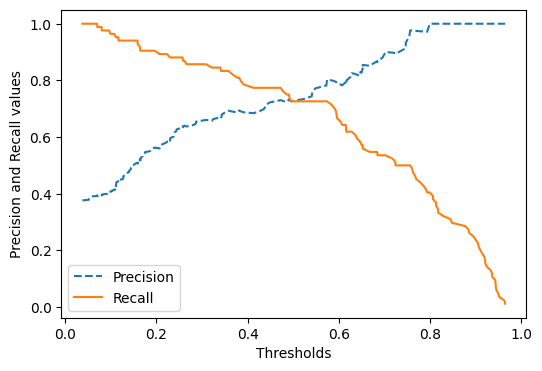

In [17]:
# 정밀도-재현율 변화 과정 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# threshold에 따른 precisio, recall값 반환
precision, recall, thresholds = precision_recall_curve(y_test, predict_proba_1)

# 기준 thresholds 211개
# - 정밀도와 재현율에 추가돤 마지막 값은 극단적 임계값 설정에 대한 계산 결과
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재현율은 마지막에 0 추가 (임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)
# precision.shape, recall.shape, thresholds.shape


plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], linestyle='--', label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Precision and Recall values')
plt.legend()
plt.show()

- F1-score
    - 정밀도와 재현율을 결합한 지표

    $ F1 = \frac{2 \times precision \times recall}{precision + recall} $

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_test)

0.7305389221556886

In [19]:
# 오차행렬, 정확도, 정밀도, 재현율, f1-score 계산 및 출력 함수
def evaluate_binary_classification(y_true, y_pred):
    print("혼동행렬:\n", confusion_matrix(y_true, y_pred))
    print(f"정확도: {accuracy_score(y_true, y_pred):.2f} 정밀도: {precision_score(y_true, y_pred):.2f} 재현율: {recall_score(y_true, y_pred):.2f}, f1: {f1_score(y_true, y_pred):.5f}")

In [20]:
# 임계치 별 평가 결과 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)
        
evaluate_by_threshold(y_test, predict_proba_1, thresholds)

혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.78 정밀도: 0.68 재현율: 0.77, f1: 0.72626
혼동행렬:
 [[115  24]
 [ 19  65]]
정확도: 0.81 정밀도: 0.73 재현율: 0.77, f1: 0.75145
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.80 정밀도: 0.73 재현율: 0.73, f1: 0.73054
혼동행렬:
 [[122  17]
 [ 23  61]]
정확도: 0.82 정밀도: 0.78 재현율: 0.73, f1: 0.75309
혼동행렬:
 [[124  15]
 [ 29  55]]
정확도: 0.80 정밀도: 0.79 재현율: 0.65, f1: 0.71429
혼동행렬:
 [[130   9]
 [ 36  48]]
정확도: 0.80 정밀도: 0.84 재현율: 0.57, f1: 0.68085
혼동행렬:
 [[134   5]
 [ 39  45]]
정확도: 0.80 정밀도: 0.90 재현율: 0.54, f1: 0.67164


#### ROC Curve - AUC

- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축: FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPR = FP / (FP + TN)
    - y축: TPR (True Positive Rate), recall score
        - TPR = TP / (FN + TP)
- AUC (Area Under Curve) : ROC 곡선 아래 면적 (1에 가까울수록 성능 좋음)

In [21]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


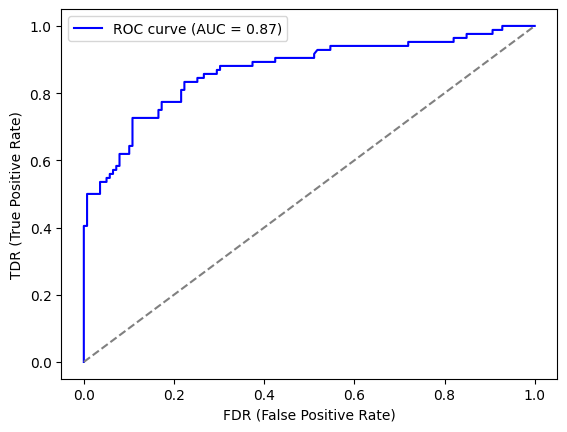

In [22]:
from sklearn.metrics import auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FDR (False Positive Rate)')
plt.ylabel('TDR (True Positive Rate)')
plt.legend()
plt.show()

### 회귀모델 평가

In [23]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [24]:
from sklearn.metrics import mean_squared_error              # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error         # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error             # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error          # MSLE (평굽 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error     # RMSELE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                        # R^2 (결정계수)


print(mean_squared_error(y_true, y_pred))
print(root_mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_log_error(y_true, y_pred))
print(root_mean_squared_log_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

1.125
1.0606601717798212
0.75
0.058006407800631835
0.2408451946803835
0.8059299191374663
